In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [0]:
def divvy_pop(population, prop):
    '''
    Divide susceptible population into quarantine and non-quarantine
    
    Inputs:
    population: int
    prop: proportion of people who quarantine themselves

    Return: tuple (quarantined, non-quarantined)
    '''

    quarantined = population * prop
    non_quarantined = population - quarantined

    return quarantined, non_quarantined


In [0]:
def visualize_model(init_states, Tmax, beta, gamma, q_prop):
    '''
    Visualize the change in total of susceptibles, infectious, recovered population. 
    A maximum of infectious population will also be identified and returned. 

    init_states: tuple of initial (S, I, R)
    Tmax: the duration of the epidemic
    beta: normal rate of transmission
    gamma: rate of recovery
    q_prop: proportion of people quarantined
    '''
    # Generate variables:
    ## unpack state variables
    S_init, I_init, R_init = init_states 
    N = S_init + I_init + R_init

    # Set up the time array
    dt = 1    # day
    #Niter = int(Tmax/dt) #determine the number of iterations
    time = range(0,Tmax + 1,dt) # preallocate the time array

    # Set up S, I, R arrays
    S = [0] * (Tmax + 1)    # preallocate the solution array
    I = [0] * (Tmax + 1)
    R = [0] * (Tmax + 1)

    # Solve each ODE using Forward Euler
    for i in range(Tmax):
      
      S[0] = S_init
      I[0] = I_init
      R[0] = R_init

      ## dividing S and I into quarantined and non-quarantined:
      Sq, Snq = divvy_pop(S[i], q_prop)
      Iq, Inq = divvy_pop(I[i], q_prop)

      # sample beta from a distribution
      beta_sim = np.random.normal(beta, 0.25)
      beta_less = beta_sim * 0.5

      dSdt = -(beta_less*Sq*Iq + beta_sim*Sq*Inq + beta_less*Snq*Iq + beta_sim*Snq*Inq)/N
      S[i+1] = S[i] + dt*dSdt

      dIdt = (beta_less*Sq*Iq + beta_sim*Sq*Inq + beta_less*Snq*Iq + beta_sim*Snq*Inq)/N - gamma*I[i]
      I[i+1] = I[i] + dt*dIdt

      dRdt = gamma * I[i]
      R[i+1] = R[i] + dt*dRdt

    plt.plot(time, S, 'g', label="S(t)")
    plt.plot(time, I, 'r', label="I(t)")
    plt.plot(time, R, 'b', label="R(t)")
    plt.hlines(41333, 0, Tmax,'y', label="hospital capacity")

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Effects of " + str(q_prop) + " Quarantine with initial population " + str(init[1]))
    plt.legend()
    plt.show()

    print('Maximum infected = ' + str(max(I)))
    
    return max(I)

In [0]:
def visualize_model_const(init_states, Tmax, beta, gamma, q_prop):
    '''
    Visualize the change in total of susceptibles, infectious, recovered population. 
    A maximum of infectious population will also be identified and returned. 

    init_states: tuple of initial (S, I, R)
    Tmax: the duration of the epidemic
    beta: normal rate of transmission
    gamma: rate of recovery
    q_prop: proportion of people quarantined
    '''
    # Generate variables:
    ## unpack state variables
    S_init, I_init, R_init = init_states 
    N = S_init + I_init + R_init

    # Set up the time array
    dt = 1    # day
    #Niter = int(Tmax/dt) #determine the number of iterations
    time = range(0,Tmax + 1,dt) # preallocate the time array

    # Set up S, I, R arrays
    S = [0] * (Tmax + 1)    # preallocate the solution array
    I = [0] * (Tmax + 1)
    R = [0] * (Tmax + 1)

    # Solve each ODE using Forward Euler
    for i in range(Tmax):
      
      S[0] = S_init
      I[0] = I_init
      R[0] = R_init

      ## dividing S and I into quarantined and non-quarantined:
      Sq, Snq = divvy_pop(S[i], q_prop)
      Iq, Inq = divvy_pop(I[i], q_prop)

      # sample beta from a distribution
      beta_less = beta * 0.5

      dSdt = -(beta_less*Sq*Iq + beta*Sq*Inq + beta_less*Snq*Iq + beta*Snq*Inq)/N
      S[i+1] = S[i] + dt*dSdt

      dIdt = (beta_less*Sq*Iq + beta*Sq*Inq + beta_less*Snq*Iq + beta*Snq*Inq)/N - gamma*I[i]
      I[i+1] = I[i] + dt*dIdt

      dRdt = gamma * I[i]
      R[i+1] = R[i] + dt*dRdt

    plt.plot(time, S, 'g', label="S(t)")
    plt.plot(time, I, 'r', label="I(t)")
    plt.plot(time, R, 'b', label="R(t)")
    plt.hlines(41333, 0, Tmax,'y', label="hospital capacity")

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Effects of " + str(q_prop) + " Quarantine with initial population " + str(init[1]))
    plt.legend()
    plt.show()

    print('Maximum infected = ' + str(max(I)))
    
    return max(I)

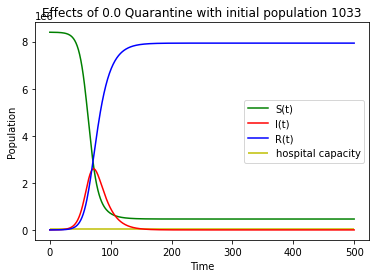

Maximum infected = 2595172.7934919195


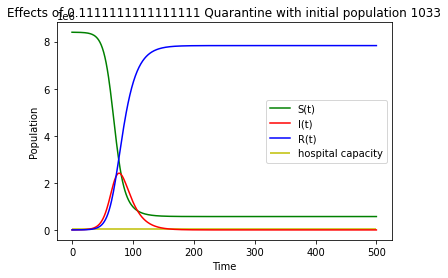

Maximum infected = 2409694.4265479697


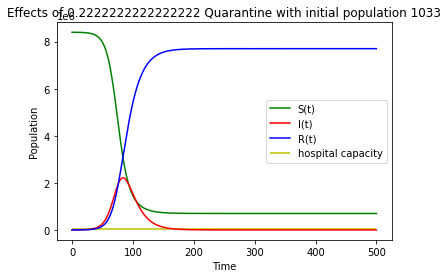

Maximum infected = 2214190.3873053035


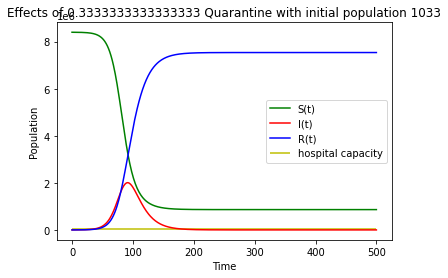

Maximum infected = 2006640.383051286


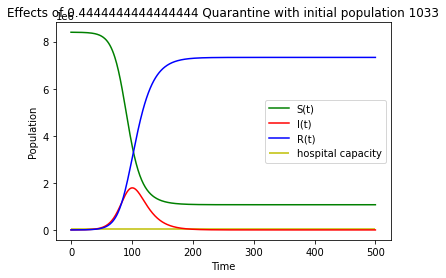

Maximum infected = 1787181.7964043594


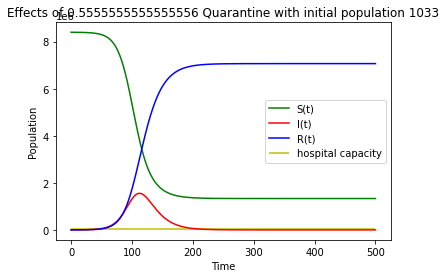

Maximum infected = 1555186.1403928564


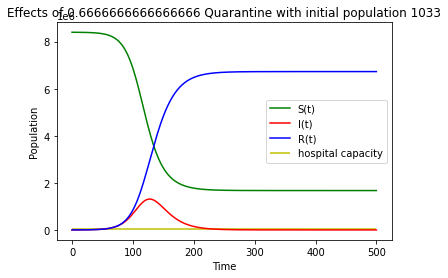

Maximum infected = 1311238.7181628188


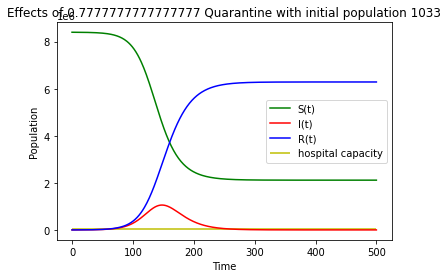

Maximum infected = 1057123.3925479758


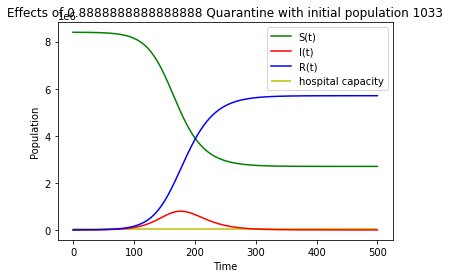

Maximum infected = 795914.1056453008


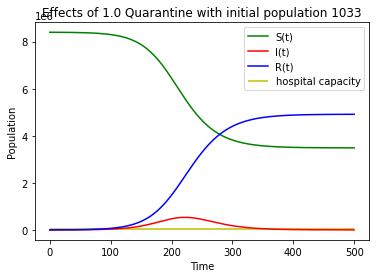

Maximum infected = 535328.8218282182


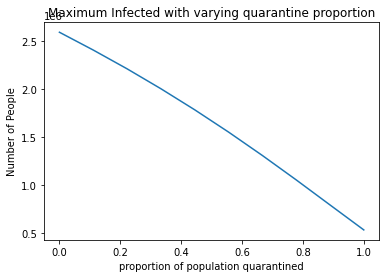

In [0]:
# NYC
# Varying the proportion of quarantined population with constant beta

# 1033 is the number infected when shelter order was issued
init = (8399000, 1033, 0)

# parameters
beta = 3/14
sd_b = 0.03
gamma = 1/14

# Generate a number of plots with varying quarantined population
props = np.linspace(0, 1, 10)
max_i = []
for q_prop in props:
  res = visualize_model_const(init, 500, beta, gamma, q_prop)
  max_i.append(res)

plt.plot(props, max_i)
plt.title("Maximum Infected with varying quarantine proportion")
plt.xlabel("proportion of population quarantined")
plt.ylabel("Number of People")
plt.show()

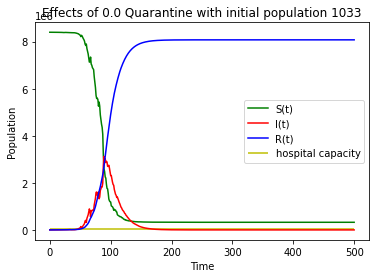

Maximum infected = 3119962.7654881203


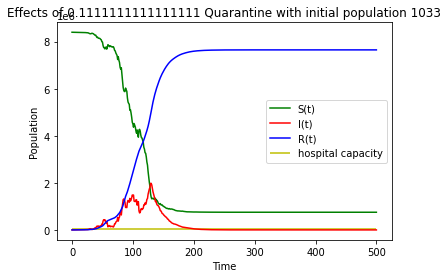

Maximum infected = 1979332.852531731


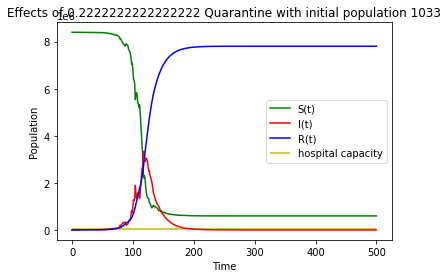

Maximum infected = 3331456.628489549


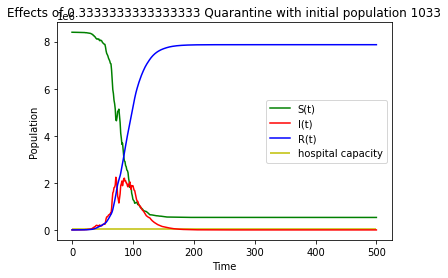

Maximum infected = 2237993.8364097658


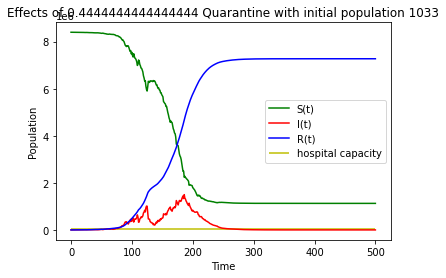

Maximum infected = 1499871.1033479956


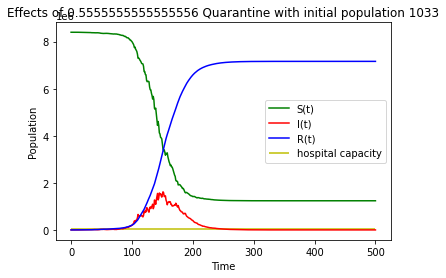

Maximum infected = 1619141.0099149826


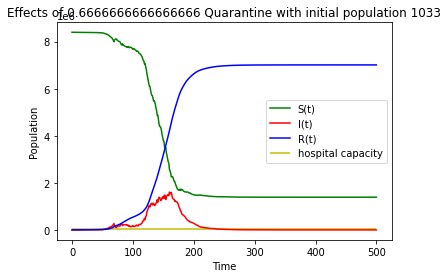

Maximum infected = 1609632.4159628593


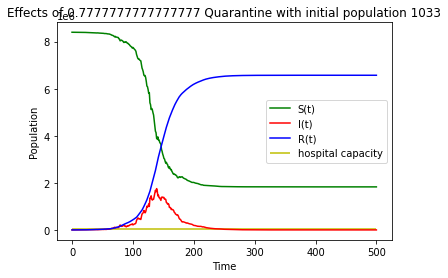

Maximum infected = 1755496.2898884811


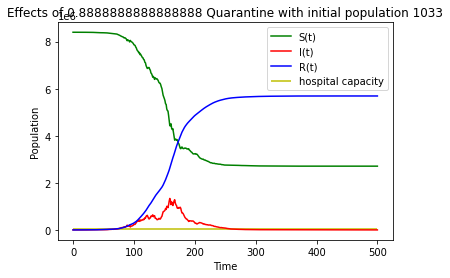

Maximum infected = 1337707.767997543


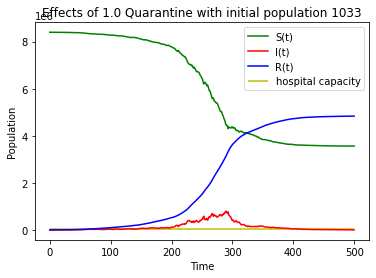

Maximum infected = 789878.2524890153


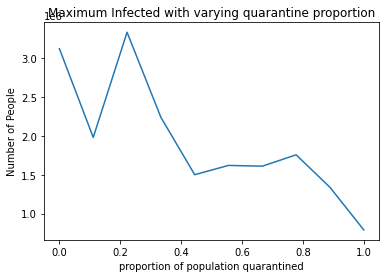

In [0]:
# NYC
# Varying the proportion of quarantined population

# 1033 is the number infected when shelter order was issued
init = (8399000, 1033, 0)

# parameters
beta = 3/14
sd_b = 0.03
gamma = 1/14

# Generate a number of plots with varying quarantined population
props = np.linspace(0, 1, 10)
max_i = []
for q_prop in props:
  max_i.append(visualize_model(init, 500, beta, gamma, q_prop))

plt.plot(props, max_i)
plt.title("Maximum Infected with varying quarantine proportion")
plt.xlabel("proportion of population quarantined")
plt.ylabel("Number of People")
plt.show()

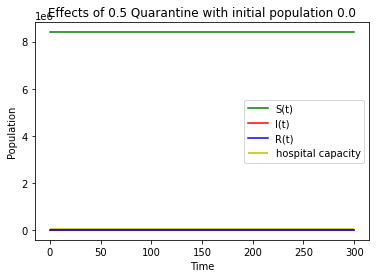

Maximum infected = 0.0


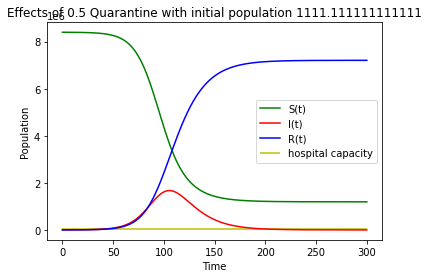

Maximum infected = 1672785.2668738205


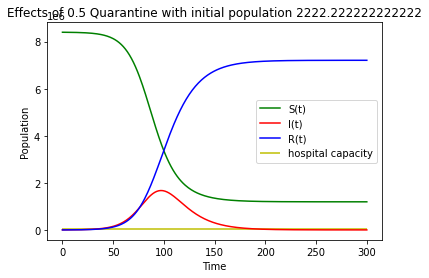

Maximum infected = 1673643.7487170107


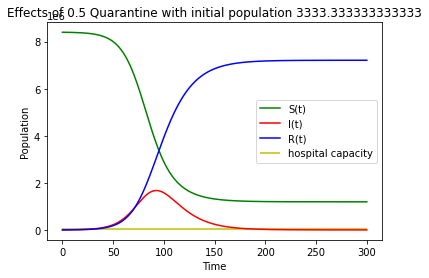

Maximum infected = 1674051.1772632676


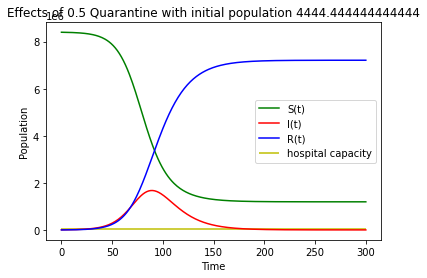

Maximum infected = 1675180.0559334136


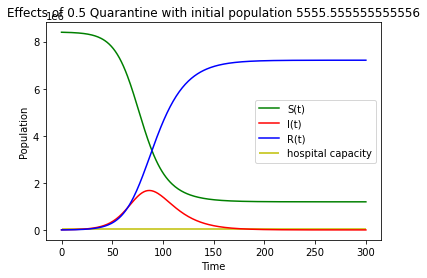

Maximum infected = 1675509.3842045304


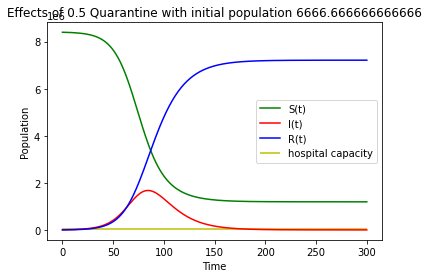

Maximum infected = 1676458.4429920237


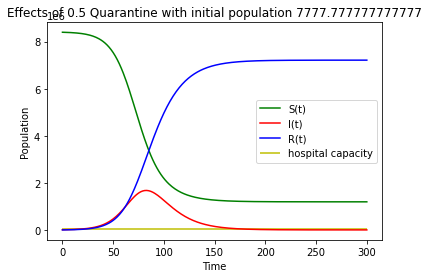

Maximum infected = 1676899.7830458581


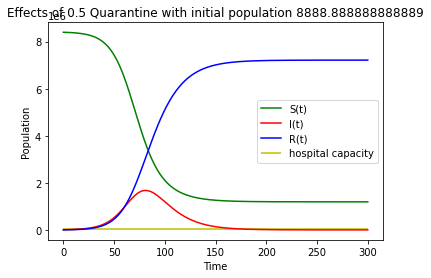

Maximum infected = 1678103.1256203938


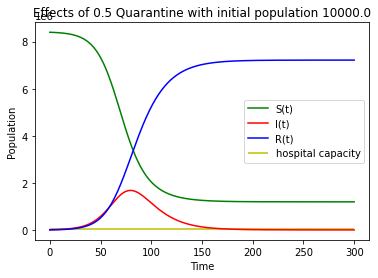

Maximum infected = 1678430.1904820027


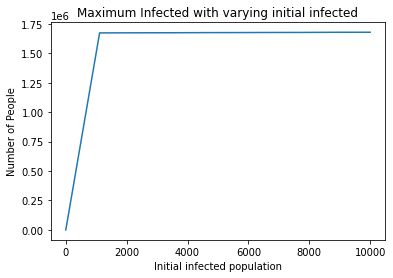

In [0]:
# NYC
# Varying the initial infected population with constant beta

# 1033 is the number infected when shelter order was issued
init_pop = np.linspace(0, 10000, 10)
lst_init = []
for pop in init_pop:
  init = (8399000, pop, 0)
  lst_init.append(init)

# parameters
beta = 3/14
sd_b = 0.03
gamma = 1/14
q_prop = 0.5

# Generate a number of plots with varying quarantined population
max_i = []
for init in lst_init:
  max_i.append(visualize_model_const(init, 300, beta, gamma, q_prop))

plt.plot(init_pop, max_i)
plt.title("Maximum Infected with varying initial infected")
plt.xlabel("Initial infected population")
plt.ylabel("Number of People")
plt.show()

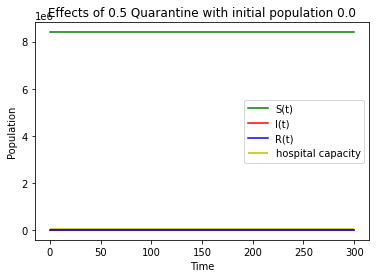

Maximum infected = 0.0


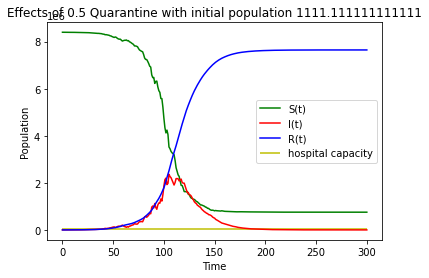

Maximum infected = 2363684.540604021


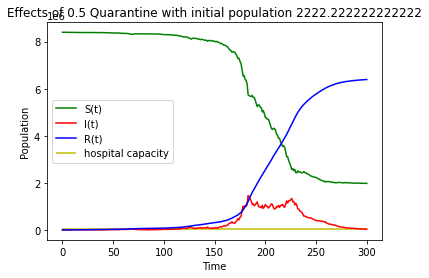

Maximum infected = 1457351.532951917


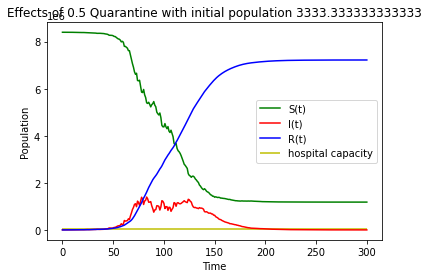

Maximum infected = 1395501.085987833


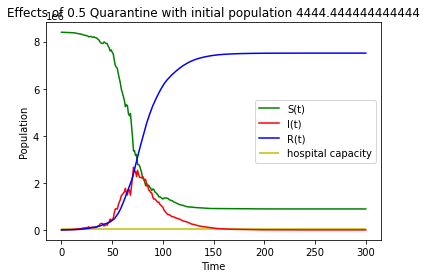

Maximum infected = 2663271.8807169907


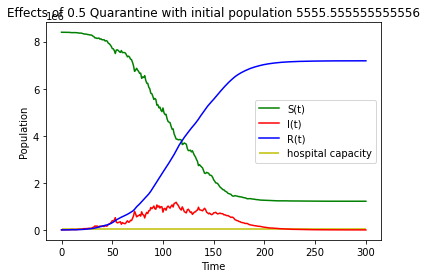

Maximum infected = 1174915.289011193


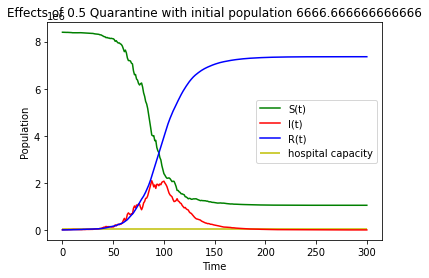

Maximum infected = 2090728.8900445914


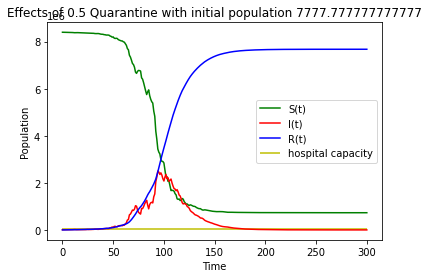

Maximum infected = 2501246.1735733


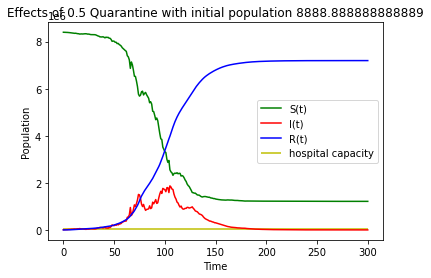

Maximum infected = 1871061.0693147164


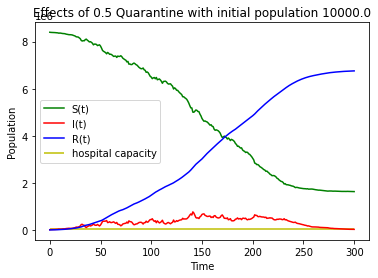

Maximum infected = 767140.217594559


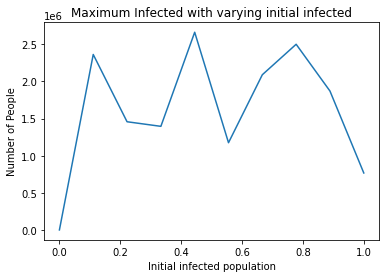

In [0]:
# NYC
# Varying the initial infected population

# 1033 is the number infected when shelter order was issued
init_pop = np.linspace(0, 10000, 10)
lst_init = []
for pop in init_pop:
  init = (8399000, pop, 0)
  lst_init.append(init)

# parameters
beta = 3/14
sd_b = 0.03
gamma = 1/14
q_prop = 0.5

# Generate a number of plots with varying quarantined population
max_i = []
for init in lst_init:
  max_i.append(visualize_model(init, 300, beta, gamma, q_prop))

plt.plot(props, max_i)
plt.title("Maximum Infected with varying initial infected")
plt.xlabel("Initial infected population")
plt.ylabel("Number of People")
plt.show()